In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df=pd.read_csv('../../data/Complete_Housing_set.csv').dropna()

# columns with different feature subsets
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'price']
columns_0 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']
columns_1 = ['sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_basement', 'yr_renovated', 'lat']
columns_2 = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated','lat']
columns_3 = ['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']

X=df[columns_0].values  # here used 0
y=df['price'].values

# split training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.25, random_state=5)

print(X_train.shape, X_test.shape)


(16197, 16) (5400, 16)


In [2]:
# Preprocessing
## feature scaling 
from sklearn.preprocessing import StandardScaler    # Other one: MinMaxScaler

scale = StandardScaler()
#X_train = X_train.reshape(-1, 1)
# Only use this for training data, not testing data. Otherwise, the mean/var will be leaked to the testing data
X_scaled = scale.fit_transform(X_train) # standardize
df.head()

# covariant matrix plot
'''
cov_df = pd.DataFrame(np.cov(scale.fit_transform(df[columns].values), rowvar=False))
cov_df.columns = cov_df.index = columns
plt.figure(figsize=(10, 8))
sns.heatmap(cov_df, annot=True, cmap='coolwarm', fmt='.2f')
'''

"\ncov_df = pd.DataFrame(np.cov(scale.fit_transform(df[columns].values), rowvar=False))\ncov_df.columns = cov_df.index = columns\nplt.figure(figsize=(10, 8))\nsns.heatmap(cov_df, annot=True, cmap='coolwarm', fmt='.2f')\n"

In [3]:
# Modeling
## linear regression model 
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_scaled, y_train)   # Use lr.fit to train the model

print(lr.coef_, lr.intercept_)

[-32434.30564156  33298.32118974  85637.53047965  -1847.55113852
   1687.26883832  43930.26806878  41404.79642359  16956.10840094
 115695.8436856   81074.48691968  25241.21254678 -79324.39468363
   6934.23494833 -33179.85182837  85154.56384895 -29683.29169881] 539253.1917639062


In [4]:
# Model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score    # Higher (1) better
# r2 = 1 - RSS/TSS, where RSS=sum of error, TSS=variance (sum of squares from average)

X_test_scaled = scale.transform(X_test) # transform back using the scalar before
ytest_pred = lr.predict(X_test_scaled)

# testing data performance

mae = mean_absolute_error(y_test, ytest_pred)
print('Mean absolute error: ', mae)

mse = mean_squared_error(y_test, ytest_pred, squared= True)
print('Mean squared error: ', mse)

r2 = r2_score(y_test, ytest_pred)
print('R2 score is: ', r2)

Mean absolute error:  125870.20166330662
Mean squared error:  38120952749.19202
R2 score is:  0.7232734256343609


In [5]:
# Training data performance
ytrain_pred = lr.predict(X_scaled)

mae = mean_absolute_error(y_train, ytrain_pred)
print('Mean absolute error: ', mae)

mse = mean_squared_error(y_train, ytrain_pred, squared= True)
print('Mean squared error: ', mse)

r2 = r2_score(y_train, ytrain_pred)
print('R2 score is: ', r2)

Mean absolute error:  126733.06088385748
Mean squared error:  41427203480.724174
R2 score is:  0.6903454093251953


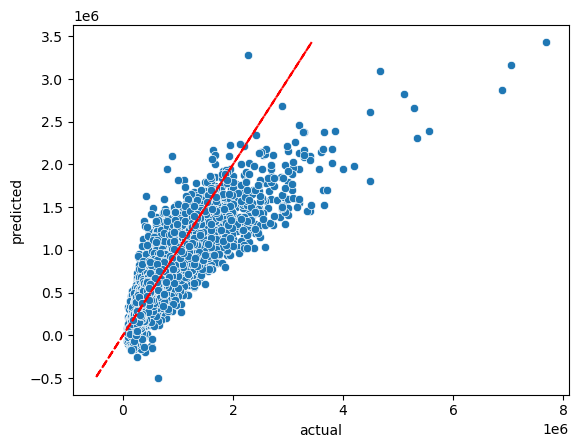

In [9]:
# plot the predicted vs actual result
training_data = {'x':X_train.flatten(), 'actual':y_train, 'predicted': ytrain_pred}
testing_data = {'x': X_test_scaled, 'actual': y_test, 'predicted':ytest_pred}
sns.scatterplot(data = pd.DataFrame({'predicted':np.concatenate((ytrain_pred, ytest_pred)), 'actual':np.concatenate((y_train,y_test))}), x='actual', y='predicted')
plt.plot(np.concatenate((ytrain_pred, ytest_pred)), np.concatenate((ytrain_pred, ytest_pred)), color='red', linestyle='--')  # Plotting y=x as a dashed red line